In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
heart_df=pd.read_csv('D:\Python Projects\Heart_disease\heart_data.csv')
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Lets find out the missing values and their percentages in the data

In [3]:
heart_df.isna().sum()*100/len(heart_df)

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

</b> As it seen, the percentage of missing values is less, hence we can remove them without compromising the data.</b>

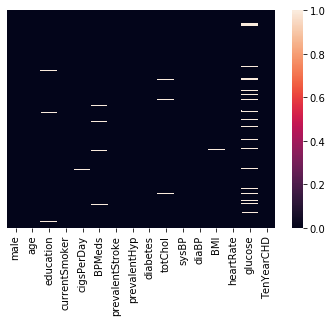

In [4]:
# Visualizing the missing values using the seaborn
sns.heatmap(heart_df.isna(),yticklabels=False)

In [5]:
# Dropping the missing values
heart_df.dropna(inplace=True)

0    2034
1    1622
Name: Gender, dtype: int64


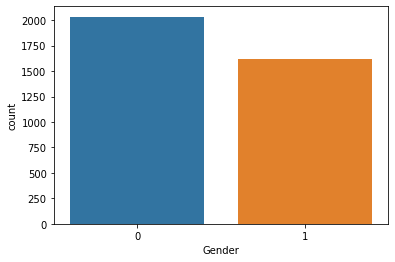

In [6]:
# Replacing Male column
# Gender
heart_df['Gender']=heart_df['male']
print(heart_df['Gender'].value_counts())
heart_df['Gender']=heart_df['Gender'].astype('category')
sns.countplot(heart_df.Gender)

In [7]:
# Seperating the category and Numerical columns
cat_col=['education', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
num_col=['age','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

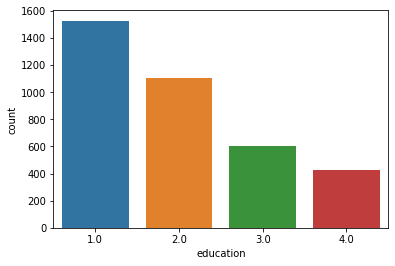

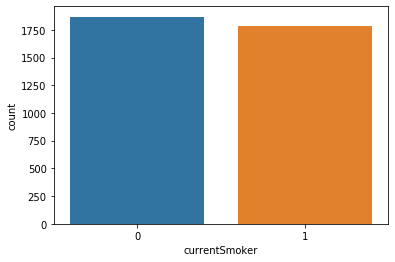

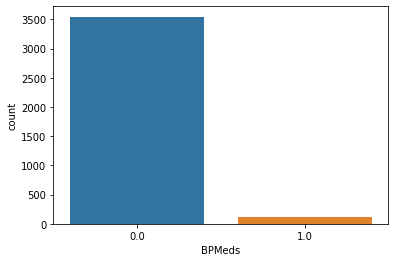

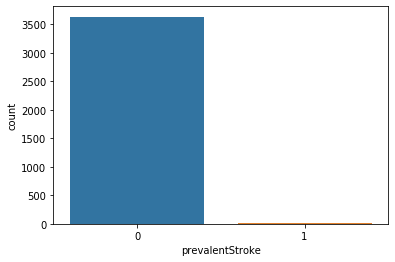

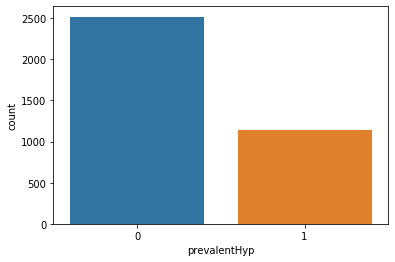

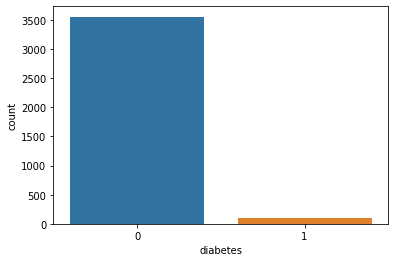

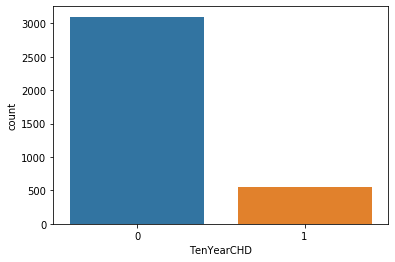

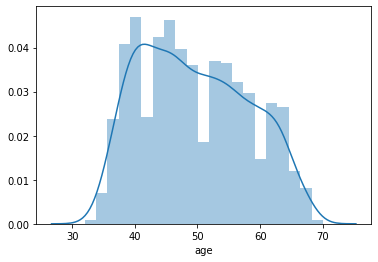

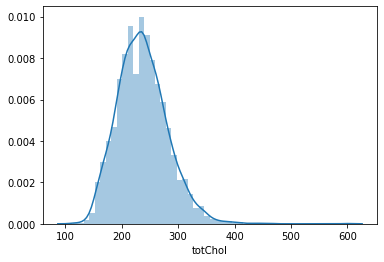

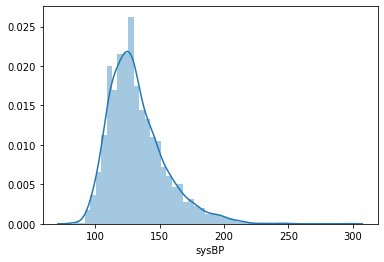

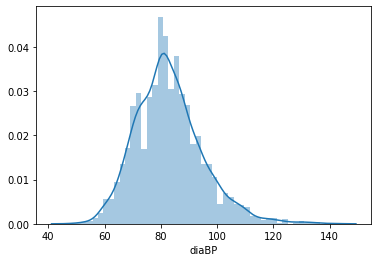

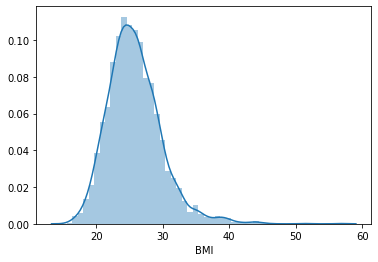

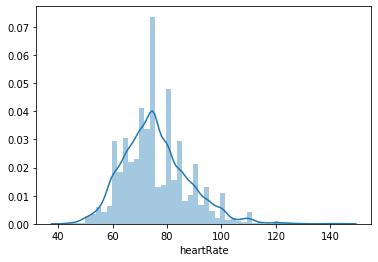

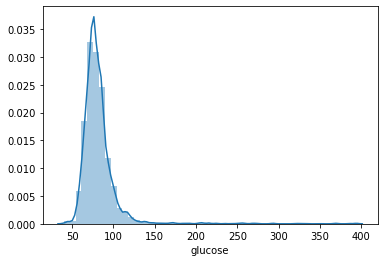

In [8]:
for i in heart_df[cat_col]:
    heart_df[i]=heart_df[i].astype('category')
    sns.countplot(heart_df[i])
    plt.show()

for i in heart_df[num_col]:
    sns.distplot(heart_df[i])
    plt.show()

In [9]:
# Standardising the numeric values
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
heart_df=heart_df.drop(columns=['male'])
heart_df[num_col]=std.fit_transform(heart_df[num_col])

In [10]:
# Splitting the Data
X=heart_df.drop(columns=['TenYearCHD'])
y=heart_df['TenYearCHD']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [19]:
X_train.shape

(2559, 15)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score


In [24]:
svc=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

models=[lg_reg,svc,dt,rf]

for i in models:
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    print(score)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

0.837739288969918
[[904   6]
 [172  15]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       910
           1       0.71      0.08      0.14       187

    accuracy                           0.84      1097
   macro avg       0.78      0.54      0.53      1097
weighted avg       0.82      0.84      0.78      1097

0.8295350957155879
[[910   0]
 [187   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       910
           1       0.00      0.00      0.00       187

    accuracy                           0.83      1097
   macro avg       0.41      0.50      0.45      1097
weighted avg       0.69      0.83      0.75      1097

0.7411121239744758
[[760 150]
 [134  53]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       910
           1       0.26      0.28      0.27       187

    accuracy                           0.74      1097
   

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8359161349134002
[[904   6]
 [174  13]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       910
           1       0.68      0.07      0.13       187

    accuracy                           0.84      1097
   macro avg       0.76      0.53      0.52      1097
weighted avg       0.81      0.84      0.78      1097

